In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
data = np.loadtxt("/home/usuario/Documentos/catalinaM/Programas/stellar_radius.dat") # Carga el archivo como un arreglo de numeros
t_desord=[data[i-1:i,0:1][0][0] for i in range(1,len(data)+1)]
R_desord=[data[i-1:i,1:2][0][0] for i in range(1,len(data)+1)]

x_list,y_list=zip(*sorted(zip(t_desord,R_desord)))

In [54]:
def InterpoladorLineal(x_list,y_list,x):
    for i in range(0,len(x_list)-1):
        if(x>=x_list[i] and x<=x_list[i+1]):
            x_prev=x_list[i]
            y_prev=y_list[i]
            x_next=x_list[i+1]
            y_next=y_list[i+1]
            
            y= (y_next-y_prev)/(x_next-x_prev)*(x-x_prev)+y_prev
            
            return y

x_interpol=np.linspace(min(x_list),max(x_list),50000)
y_interpol=[InterpoladorLineal(x_list,y_list,x_interpol[i]) for i in range(len(x_interpol))]   

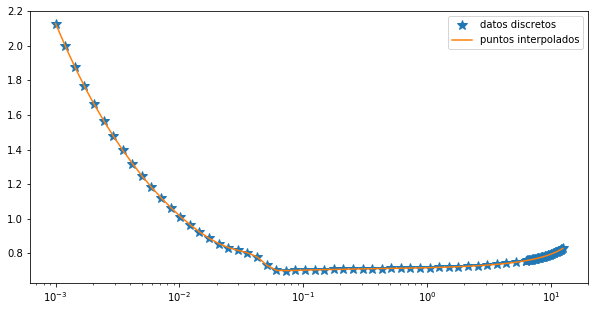

In [55]:
fig=plt.figure(figsize=(10,5))
ax=plt.axes()
plt.xscale('log')
ax.plot(x_list,y_list,'*',markersize='10',label='datos discretos')
ax.plot(x_interpol,y_interpol,label='puntos interpolados')
ax.legend()
plt.show()